In [1]:
# toy_train
import torch, pytorch_lightning as pl
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
from model_architectures.wcgan import ConditionalWGAN         # <-- import your class

#
# -------  HYPER-PARAMS  -------------------------------------------------
#
n_classes        = 10          # MNIST labels 0-9
batch_size       = 64
epochs           = 5           # enough to see convergence
lr_g             = 2e-4
λ_gp             = 10
z_dim            = 128
n_critic         = 2           # keeps kernels short
device_precision = 32          # full fp32 for stability
#
# -----------------------------------------------------------------------

# 1. Data ----------------------------------------------------------------
tfm = transforms.Compose([
    transforms.Resize(64),         # -> 64×64 so it matches your GAN
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5) # [-1,1] range
])
mnist = datasets.MNIST(root="data", train=True, download=True, transform=tfm)
loader = DataLoader(mnist, batch_size=batch_size, shuffle=True, num_workers=4)

# 2. Model ---------------------------------------------------------------
model = ConditionalWGAN(
    n_classes=n_classes,
    z_dim=z_dim,
    lr=lr_g,
    n_critic=n_critic,
    grad_penalty_weight=λ_gp,
)

# 3. Trainer -------------------------------------------------------------
trainer = pl.Trainer(
    max_epochs=epochs,
    accelerator="auto",
    precision=device_precision,
    log_every_n_steps=20,
    enable_progress_bar=True,
)
trainer.fit(model, train_dataloaders=loader)


Error importing huggingface_hub.file_download: 'Version'


/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:00<00:00, 30.6MB/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=5` reached.


In [2]:
# 4. Quick inference -----------------------------------------------------
model.eval()
with torch.no_grad():
    # 8 samples for each digit 0-9
    imgs = []
    for y in range(10):
        imgs.append(model.sample(label=y, N=8))  # (8,1,64,64)
    grid = utils.make_grid(torch.cat(imgs, 0), nrow=8, value_range=(0,1))
    # utils.save_image(grid, "mnist_wgan_samples.png")
    # print("Saved sample grid → mnist_wgan_samples.png")


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0049,  ..., 0.0183, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0094,  ..., 0.0038, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0049,  ..., 0.0183, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0094,  ..., 0.0038, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0049,  ..., 0.0183, 0.0000, 0.

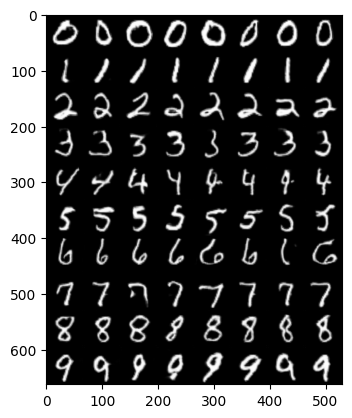

In [4]:

import matplotlib.pyplot as plt
plt.imshow(grid.permute(1,2,0).cpu())